In [1]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)

2.8.0
2.8.0


In [2]:
import os, shutil
original_dataset_dir = '/Users/jw1010110/TFexamples/dogs-vs-cats/train'

base_dir = '/Users/jw1010110/TFexamples/dogs-vs-cats/cats_and_dogs_small'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [3]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)


In [4]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [5]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [21]:
#디렉터리 생성 후 경로 변수만 필요햘 떄
import os
original_dataset_dir = '/Users/jw1010110/TFexamples/dogs-vs-cats/train'
base_dir = '/Users/jw1010110/TFexamples/dogs-vs-cats/cats_and_dogs_small'

train_dir = os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
test_cats_dir = os.path.join(test_dir,'cats')
test_dogs_dir = os.path.join(test_dir,'dogs')

In [22]:
import os
original_dataset_dir = '/Users/jw1010110/TFexamples/dogs-vs-cats/train'
base_dir = '/Users/jw1010110/TFexamples/dogs-vs-cats/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))

1000
1000
500


In [23]:
#ImageDataGenerator 사용하여 데이터 증식 설정하기
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20, #랜덤하게 사진을 회전시킬 각도 범위(0~180사이)
    width_shift_range=0.1, #사진을 수평으로 랜덤하게 평행이동 시킬 범위
    height_shift_range=0.1, #사진을 수직으로 랜덤하게 평행이동 시킬 범위
    shear_range=0.1, #랜덤하게 전단 변환을 적용할 각도 범위
    zoom_range=0.1, #랜덤하게 사진을 확대할 범위
    horizontal_flip=True, #랜덤하게 이미지를 수평으로 뒤집는다.(풍경 또는 인물사진. 뒤집힌 글자 등은 학습에 도움이 안되니 false)
    fill_mode='nearest' #회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략
)

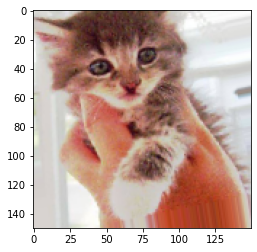

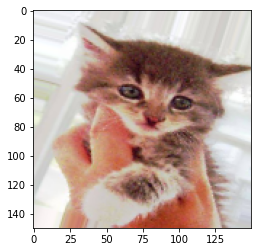

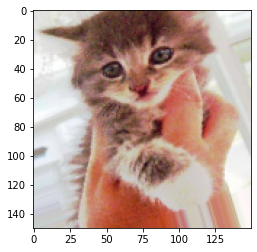

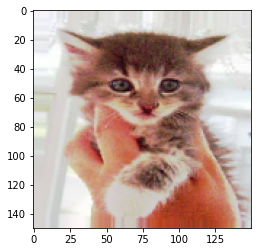

In [24]:
#랜덤하게 증식된 훈련 이미지 그리기

from keras.preprocessing import image #이미지 전처리 유틸리티 모듈
import matplotlib.pyplot as plt

fnames = sorted([os.path.join(train_cats_dir,fname)for fname in os.listdir(train_cats_dir)]) 
                                                                #listdir=>지정한 디렉터리 내의 모든 파일과 디렉터리 이름 리턴
img_path = fnames[3] #증식할 이미지 선택

img = image.load_img(img_path, target_size=(150,150)) #이미지를 읽고 크기를 변경

x=image.img_to_array(img) #(150,150,3)크기의 넘파이 배열 반환

x = x.reshape((1,) + x.shape) #(1,150,150,3) 크기로 변환

i=0
for batch in datagen.flow(x,batch_size=1): #이하 랜덤하게 변환된 이미지 배치를 생성. 무한 반복됨으로 중단점 설정해야함
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0: #중단점
        break
plt.show()

In [25]:
#컨브넷에서 학습된 패턴은 평행 이동 불변성을 가진다.=> 예를들어 컨브넷이 이미지 오른쪽 하단에서 임의의 패턴을 학습했다면 다른 위치에서도 그 패턴을 인식함.
#                                         반면에 완전연결 네트워크는 새로운 위치에 나타난 패턴은 새로운 패턴으로 인식함.
#                                         따라서 컨브넷은 보다 적은 훈련 샘플을 사용해 일반화 능력을 가진 표현을 학습할 수 있음.
#컨브넷은 패턴의 공간적 계층구조를 학습할 수 있다.=> 첫 번째 합성곱 층은 작은 지역 패턴을 학습함. 두 번째 합성곱 층은 첫 번째 층이 학습한 특성으로
#                                     구성된 더 큰 패턴을 학습함. 이런 방식으로 컨브넷은 매우 복잡하고 추상적인 시각적 개념을 효과적으로 학습. 
from keras import layers
from keras import models

model = models.Sequential()
#layer 1
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3))) #32개 channel, 3*3size filter, 148*148*RGB
model.add(layers.MaxPooling2D((2,2))) #74*74
#layer 2
model.add(layers.Conv2D(64,(3,3),activation='relu')) #72*72
model.add(layers.MaxPooling2D((2,2))) #36*36
#layer 3
model.add(layers.Conv2D(128,(3,3),activation='relu')) #34*34
model.add(layers.MaxPooling2D((2,2))) #17*17
#layer 4
model.add(layers.Conv2D(128,(3,3),activation='relu')) #15*15
model.add(layers.MaxPooling2D((2,2))) #7*7

model.add(layers.Flatten()) #fully connected network에 연결
model.add(layers.Dropout(0.5)) #새로운 정보를 만들 수 없고 기존의 정보를 재조합하는 것만 가능. 
                    #따라서 과대적합을 제거하기엔 불충분할 가능성이 있음. 과대적합을 더 억제하기 위해 완전 연결 분류기 직전에 Dropout층 추가함.
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [27]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [28]:
from keras.preprocessing.image import ImageDataGenerator

#아래는 데이터 증식 사용 x
# train_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(150,150),
#     batch_size=20,
#     class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(
#     validation_dir,
#     target_size=(150,150),
#     batch_size=20,
#     class_mode='binary')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, #랜덤하게 사진을 회전시킬 각도 범위(0~180사이)
    width_shift_range=0.2, #사진을 수평으로 랜덤하게 평행이동 시킬 범위
    height_shift_range=0.2, #사진을 수직으로 랜덤하게 평행이동 시킬 범위
    shear_range=0.2, #랜덤하게 전단 변환을 적용할 각도 범위
    zoom_range=0.2, #랜덤하게 사진을 확대할 범위
    horizontal_flip=True) #랜덤하게 이미지를 수평으로 뒤집는다.(풍경 또는 인물사진. 뒤집힌 글자 등은 학습에 도움이 안되니 false)
    
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150), #모든 이미지를 150*150으로 바꾼다.
    batch_size=32,
    class_mode='binary') #binary crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 한다.

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=63, #training_size / batch_size cf.100으로 하면 
                #WARNING:tensorflow:Your input ran out of data; interrupting training.
    epochs=100,
    validation_data=validation_generator,
    validation_steps=32)

Epoch 1/100


/var/folders/pn/m2bqkk014sv8108lk7tl4xy80000gn/T/ipykernel_10719/3707549307.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2022-05-16 09:14:34.449597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - ETA: 0s - loss: 0.6951 - acc: 0.4990

2022-05-16 09:14:41.492273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 9s 128ms/step - loss: 0.6951 - acc: 0.4990 - val_loss: 0.6847 - val_acc: 0.5480
Epoch 2/100
63/63 [==============================] - 8s 125ms/step - loss: 0.6823 - acc: 0.5555 - val_loss: 0.6692 - val_acc: 0.5770
Epoch 3/100
63/63 [==============================] - 8s 126ms/step - loss: 0.6762 - acc: 0.5755 - val_loss: 0.6727 - val_acc: 0.5520
Epoch 4/100
63/63 [==============================] - 8s 126ms/step - loss: 0.6683 - acc: 0.5895 - val_loss: 0.6441 - val_acc: 0.6040
Epoch 5/100
63/63 [==============================] - 8s 126ms/step - loss: 0.6563 - acc: 0.6190 - val_loss: 0.6915 - val_acc: 0.5340
Epoch 6/100
63/63 [==============================] - 8s 126ms/step - loss: 0.6482 - acc: 0.6145 - val_loss: 0.6208 - val_acc: 0.6480
Epoch 7/100
63/63 [==============================] - 8s 126ms/step - loss: 0.6368 - acc: 0.6400 - val_loss: 0.6068 - val_acc: 0.6580
Epoch 8/100
63/63 [==============================] - 8s 131ms/step - loss: 0.6237

In [30]:
model.save('cats_and_dogs_small_1.h5')

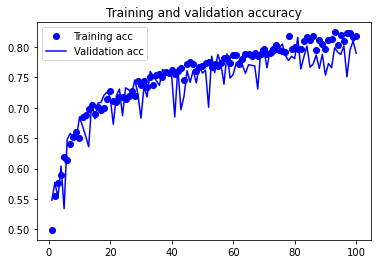

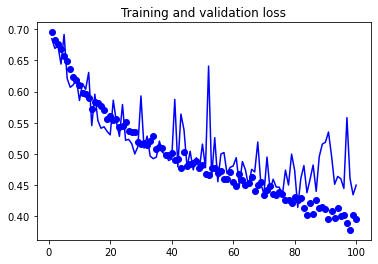

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('Training and validation loss')

plt.show()